# Demonstrate how to load field 

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import os
from glob import glob
import yaml

import numpy as np
import xarray as xr

import regrid_tools
import util

## Load case meta-data

In [23]:
with open('casedata.yml') as fid:
    casedata = yaml.safe_load(fid)
casedata

{'g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.4p2z.001branch': {'archive_root': '/glade/campaign/cesm/development/bgcwg/projects/CESM2-OMIP2-like-4p2z-run/g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.4p2z.001branch',
  'description': 'JRA-forced ocean-ice hindcast (1°)',
  'sname': 'lo-res',
  'grid': 'POP_gx1v7'},
 'g.e22.TL319_t13.G1850ECOIAF_JRA_HR.4p2z.001': {'archive_root': '/glade/campaign/collections/cmip/CMIP6/iHESP/FOSI_BGC/HR/g.e22.TL319_t13.G1850ECOIAF_JRA_HR.4p2z.001',
  'description': 'JRA-forced ocean-ice hindcast (0.1°)',
  'sname': 'hi-res',
  'grid': 'POP_tx0.1v3'}}

## Specify load 

In [24]:
variable = 'pCO2SURF'
stream = 'h'
component = 'pop'
freq = 'month_1'

case_sname = 'hi-res'

case_matches = [c for c, d in casedata.items() if d['sname'] == case_sname]
assert len(case_matches) == 1
case = case_matches[0]

cesm_model_grid = casedata[case]['grid']
archive_root = casedata[case]['archive_root']

files = sorted(glob(f"{archive_root}/ocn/proc/tseries/{freq}/{case}.{component}.{stream}.{variable}.*.nc"))
files

['/glade/campaign/collections/cmip/CMIP6/iHESP/FOSI_BGC/HR/g.e22.TL319_t13.G1850ECOIAF_JRA_HR.4p2z.001/ocn/proc/tseries/month_1/g.e22.TL319_t13.G1850ECOIAF_JRA_HR.4p2z.001.pop.h.pCO2SURF.195801-195812.nc',
 '/glade/campaign/collections/cmip/CMIP6/iHESP/FOSI_BGC/HR/g.e22.TL319_t13.G1850ECOIAF_JRA_HR.4p2z.001/ocn/proc/tseries/month_1/g.e22.TL319_t13.G1850ECOIAF_JRA_HR.4p2z.001.pop.h.pCO2SURF.195901-195912.nc',
 '/glade/campaign/collections/cmip/CMIP6/iHESP/FOSI_BGC/HR/g.e22.TL319_t13.G1850ECOIAF_JRA_HR.4p2z.001/ocn/proc/tseries/month_1/g.e22.TL319_t13.G1850ECOIAF_JRA_HR.4p2z.001.pop.h.pCO2SURF.196001-196012.nc',
 '/glade/campaign/collections/cmip/CMIP6/iHESP/FOSI_BGC/HR/g.e22.TL319_t13.G1850ECOIAF_JRA_HR.4p2z.001/ocn/proc/tseries/month_1/g.e22.TL319_t13.G1850ECOIAF_JRA_HR.4p2z.001.pop.h.pCO2SURF.196101-196112.nc',
 '/glade/campaign/collections/cmip/CMIP6/iHESP/FOSI_BGC/HR/g.e22.TL319_t13.G1850ECOIAF_JRA_HR.4p2z.001/ocn/proc/tseries/month_1/g.e22.TL319_t13.G1850ECOIAF_JRA_HR.4p2z.001.pop.

## Load a single file 

In [46]:
%%time
ds = xr.open_dataset(files[-1])
ds

CPU times: user 12.3 ms, sys: 3.08 ms, total: 15.4 ms
Wall time: 24.4 ms


<xarray.Dataset>
Dimensions:                 (z_t: 62, z_t_150m: 15, z_w: 62, z_w_top: 62, z_w_bot: 62, nlat: 2400, nlon: 3600, time: 12, d2: 2)
Coordinates:
  * z_t                     (z_t) float32 500.0 1.5e+03 ... 5.625e+05 5.875e+05
  * z_t_150m                (z_t_150m) float32 500.0 1.5e+03 ... 1.45e+04
  * z_w                     (z_w) float32 0.0 1e+03 2e+03 ... 5.5e+05 5.75e+05
  * z_w_top                 (z_w_top) float32 0.0 1e+03 ... 5.5e+05 5.75e+05
  * z_w_bot                 (z_w_bot) float32 1e+03 2e+03 ... 5.75e+05 6e+05
    ULONG                   (nlat, nlon) float64 ...
    ULAT                    (nlat, nlon) float64 ...
    TLONG                   (nlat, nlon) float64 ...
    TLAT                    (nlat, nlon) float64 ...
  * time                    (time) object 1985-02-01 00:00:00 ... 1986-01-01 ...
Dimensions without coordinates: nlat, nlon, d2
Data variables: (12/52)
    dz                      (z_t) float32 ...
    dzw                     (z_w) float32 ...
    KMT                     (nlat, nlon) float64 ...
    KMU                     (nlat, nlon) float64 ...
    REGION_MASK             (nlat, nlon) float64 ...
    UAREA                   (nlat, nlon) float64 ...
    ...                      ...
    salinity_factor         float64 ...
    sflux_factor            float64 ...
    nsurface_t              float64 ...
    nsurface_u              float64 ...
    time_bound              (time, d2) object ...
    pCO2SURF                (time, nlat, nlon) float32 ...
Attributes:
    title:             g.e22.TL319_t13.G1850ECOIAF_JRA_HR.4p2z.001
    history:           none
    Conventions:       CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-cu...
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    contents:          Diagnostic and Prognostic Variables
    source:            CCSM POP2, the CCSM Ocean Component
    revision:          $Id$
    calendar:          All years have exactly  365 days.
    start_time:        This dataset was created on 2022-09-21 at 13:29:51.9
    cell_methods:      cell_methods = time: mean ==> the variable values are ...

## Set up regridding

Specify source grid (i.e., the model)

In [47]:
src_grid = regrid_tools.grid(cesm_model_grid)
src_grid

exists: /glade/scratch/mclong/tmp/regridding/POP_tx0.1v3.nc


grid: POP_tx0.1v3
dims: (2400, 3600)
file: /glade/scratch/mclong/tmp/regridding/POP_tx0.1v3.nc

Specify destination grid

In [48]:
dst_grid = regrid_tools.grid("latlon", nx=360, ny=180, lon0=-180.0)
dst_grid

exists: /glade/scratch/mclong/tmp/regridding/latlon_1.0x1.0_lon0=-180.0.nc


grid: latlon_latlon_1.0x1.0_lon0=-180.0
dims: (180, 360)
file: /glade/scratch/mclong/tmp/regridding/latlon_1.0x1.0_lon0=-180.0.nc

### Compute regriding object

This call ESMF to compute and store a mapping file. 

Set `clobber=True` to force recomputation.

In [49]:
regrid_obj = regrid_tools.regridder(src_grid, dst_grid, method="conserve", clobber=False)
regrid_obj

source grid dims: (2400, 3600)
destination grid dims: (180, 360)


regridder POP_tx0.1v3.nc --> latlon_1.0x1.0_lon0=-180.0.nc

### Perform regridding

In [50]:
%%time
regrid_vars = [variable]

ds_1x1 = regrid_obj(ds[regrid_vars]) # does not work on dask arrays
ds_1x1

CPU times: user 2.04 s, sys: 257 ms, total: 2.3 s
Wall time: 2.43 s


<xarray.Dataset>
Dimensions:   (time: 12, nlat: 180, nlon: 360)
Coordinates:
  * time      (time) object 1985-02-01 00:00:00 ... 1986-01-01 00:00:00
Dimensions without coordinates: nlat, nlon
Data variables:
    pCO2SURF  (time, nlat, nlon) float64 nan nan nan nan ... 279.5 279.5 279.4
Attributes:
    title:             g.e22.TL319_t13.G1850ECOIAF_JRA_HR.4p2z.001
    history:           none
    Conventions:       CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-cu...
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    contents:          Diagnostic and Prognostic Variables
    source:            CCSM POP2, the CCSM Ocean Component
    revision:          $Id$
    calendar:          All years have exactly  365 days.
    start_time:        This dataset was created on 2022-09-21 at 13:29:51.9
    cell_methods:      cell_methods = time: mean ==> the variable values are ...

## Plot output

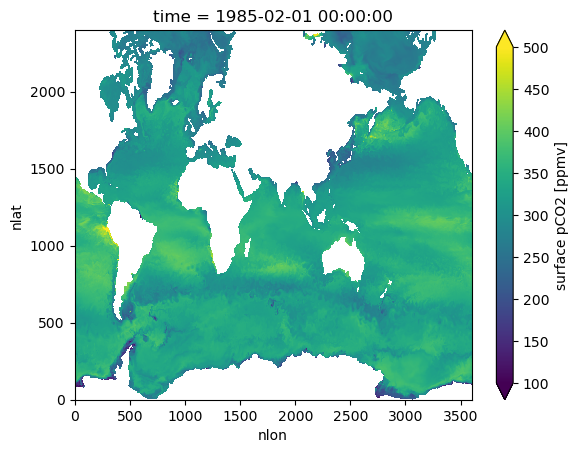

In [55]:
ds.pCO2SURF.isel(time=0).plot(vmin=100, vmax=500)

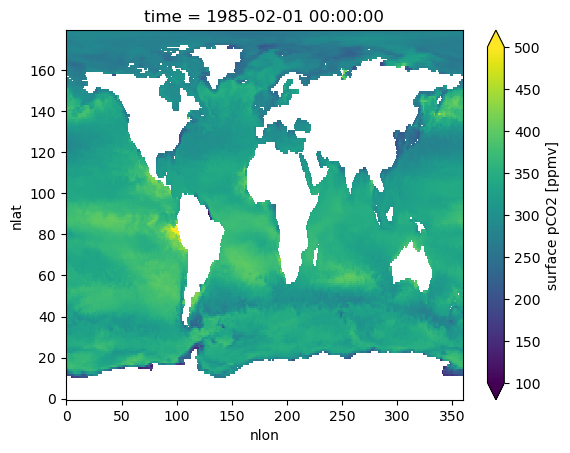

In [56]:
ds_1x1.pCO2SURF.isel(time=0).plot(vmin=100, vmax=500)